<img src="newlogomioti.png" style="height: 100px">


&nbsp;
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Machine Learning 2 (Unsupervised learning)</center>


# Worksheet S2: Aprendizaje no supervisado: PCA

## Objetivos

El objetivo de este worksheet es que aprendas a utilizar la técnica de aprendizaje no supervisado: Principal Component Analysis (PCA). 

En concreto abordaremos dos aplicaciones prácticas concretas de PCA:

* Reducción de atributos
* Identificación de grupos


## Configuración del entorno

Lo primero de todo, cargamos las librerías que vamos a necesitar, en particular sklearn es la que dispone de las herramientas específicas de machine learning con las que principalmente trabajaremos durante esta asignatura.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import sklearn

## PCA

El análisis de componentes principales (*Principal component analysis*) es una técnica que nos permite reducir la dimensionalidad de los datos, en particular desde el punto de vista de las variables, generando características "sintéticas" que aglutinen las variables más informativas de los datos.

Las características generadas por el PCA, llamadas componentes, son una combinación lineal de las variables originales.


## Ejemplo de uso PCA con datos de clasificación

Vamos a utilizar un dataset disponible en sklearn denominado "the breast cancer wisconsin" que aunque viene con etiquetas, que como ya sabéis no es el caso del aprendizaje no supervisado, nos va a ser muy útil para entender mejor cual es el resultado de la metodología PCA.

Cargamos los datos y PCA de sklearn para realizar el proceso.

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

In [4]:
cancer=load_breast_cancer()
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

Como vemos entre las características de este dataset se encuentran diferentes mediciones de masas detectadas en el pecho de diferentes pacientes obtenidas a través de una imagen digitalizada.

Para mas información del dataset consultad en el siguiente link
 https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

y también podemos echar un vistazo a los datos

In [5]:
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

Ahora vamos a generar las componentes principales, le indicamos que considere de inicio 5 componentes, podriamos generar hasta 30 componentes igual al número de variables. En este caso, pasaremos de una estructura de datos con 30 características, que son las mediciones que se han hecho para cada una de las observaciones, a solo 5 componentes.  
He elegido 5 en este caso porque ya se de antemano que necesitaremos menos de 5 pero podría haber generado las 30 para poder hacer una primera evaluación.

In [6]:
pca=PCA(n_components=5)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Guardamos el dataset con las 5 componentes:

In [7]:
transformada=pca.transform(cancer.data)

Y efectivamente el dataset original tiene 569 observaciones y 30 características y el nuevo tiene para las mismas observaciones la información recogida en 5 componentes. Veamoslo:

In [8]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 5)


Vamos a ver ahora la varianza explicada por estas 5 componentes.

In [9]:
var_explicada = pca.explained_variance_ratio_
print(var_explicada)



[9.82044672e-01 1.61764899e-02 1.55751075e-03 1.20931964e-04
 8.82724536e-05]


Y dibujamos la gráfica "de codo" para ver cuantas componentes seleccionamos. Seleccionaremos aquellas que nos proporcionen una varianza acumulada suficiente.  
En este caso como partimos de 5 componentes, unicamente estamos graficando la varianza de estas 5 componentes.
En un proyecto tendríamos que generar un número amplio de componentes en el inicio para quedarnos con las primeras que nos proporcionen una varianza suficiente y qué es suficiente: pues al menos 70% de varianza acumulada aproximadamente aunque hay situaciones en las que nos tendremos que conformar con menos.

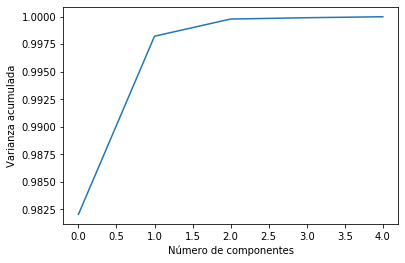

In [10]:
plt.plot(np.cumsum(var_explicada)) 
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada');

Y como vemos incluso con 1 componente obtenemos un resultado fantástico. Nos vamos a quedar con 2 componentes para visualizar los datos en un plano.   
Generamos de nuevo PCA sobre los mismos datos iniciales para que nos extraiga 2 componentes:

In [11]:
pca=PCA(n_components=2)
pca.fit(cancer.data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Guardamos el nuevo dataset con las 2 componentes

In [12]:
transformada=pca.transform(cancer.data)

y podemos comparar su estructura con el original nuevamente

In [13]:
print(cancer.data.shape)
print(transformada.shape)

(569, 30)
(569, 2)


Y efectivamente el dataset original tiene 569 observaciones y 30 características y el nuevo tiene para las mismas observaciones la información recogida en tan solo 2 componentes.

Vamos a ver ahora la varianza explicada por estas 2 componentes.

In [14]:
var_explicada = pca.explained_variance_ratio_
print(var_explicada)


[0.98204467 0.01617649]


Y dibujamos la gráfica "de codo" para confirmar lo que ya sabemos

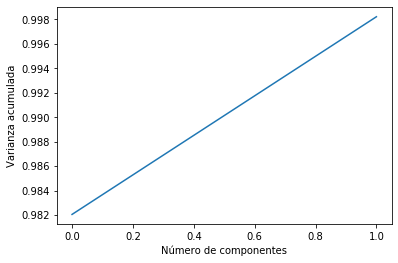

In [15]:
plt.plot(np.cumsum(var_explicada)) 
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada');

En este caso, el resultado es muy bueno porque con 2 componentes 0,982+0,016=0,998. Lo que significa que estamos recogiendo un 99,8% de la información del dataset original en solo 2 componentes.

Ojo: Aunque la técnica es fantástica, estos resultados son difíciles de conseguir.

Y ahora ya estamos en disposición de graficar las observaciones sobre estas nuevas componentes que de otra forma no podríamos realizar.

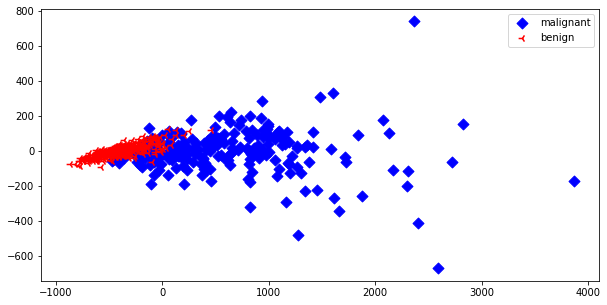

In [16]:
plt.figure(figsize=(10, 5))
cancer.target_etiqueta=cancer.target_names[cancer.target]
for lab, col,mark in zip(cancer.target_names,('blue', 'red'),('D','3')):
    plt.scatter(transformada[cancer.target_etiqueta==lab, 0],transformada[cancer.target_etiqueta==lab, 1],s=60,label=lab,c=col,marker = mark)
plt.legend()

Para mejorar el resultado y teniendo en cuenta que la escala de medidas de las variables es muy diferente podemos reescalarlas antes de realizar la reducción de dimensión y crear las componentes

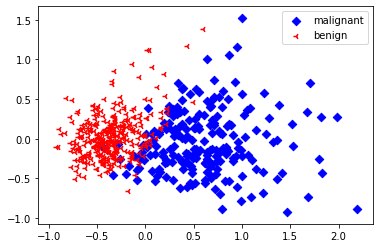

In [17]:
from sklearn.preprocessing import MinMaxScaler
escala=MinMaxScaler()
escala.fit(cancer.data)
escalada=escala.transform(cancer.data)
pca.fit(escalada)
transformada=pca.transform(escalada)
for lab, col,mark in zip(cancer.target_names,('blue', 'red'),('D','3')):
    plt.scatter(transformada[cancer.target_etiqueta==lab, 0],transformada[cancer.target_etiqueta==lab, 1],label=lab,c=col,marker = mark)
plt.legend()

Y efectivamente en este caso el resultado final queda mas claro.

## Ejemplo ficticio PCA de 2 variables a 1 componente.

Veamos ahora un PCA a través de un ejemplo ficticio generado utilizando un dataset que nos permita entender el proceso y visualizarlo de un modo sencillo.

Generamos un conjunto de datos con 2 variables para 300 observaciones y lo reduciremos a 1 sola componente.

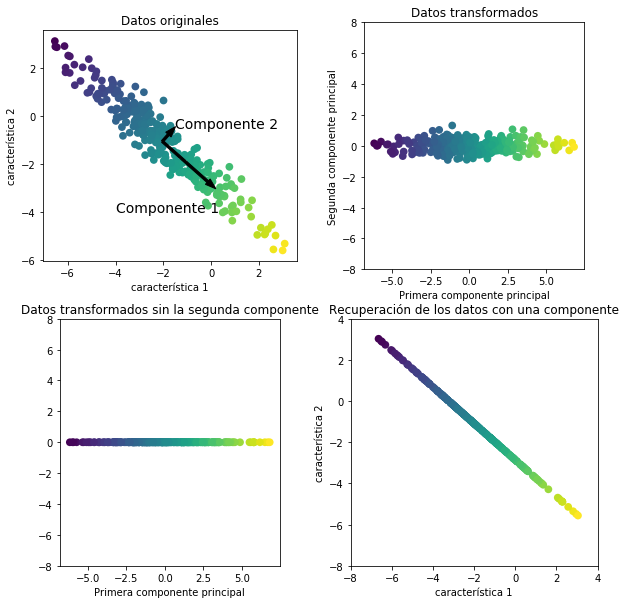

In [18]:
from sklearn.decomposition import PCA

def example_PCA():
    rnd = np.random.RandomState(5)
    X_ = rnd.normal(size=(300, 2))
    X_blob = np.dot(X_, rnd.normal(size=(2, 2))) + rnd.normal(size=2)

    pca = PCA()
    pca.fit(X_blob)
    X_pca = pca.transform(X_blob)

    S = X_pca.std(axis=0)

    fig, axes = plt.subplots(2, 2, figsize=(10, 10))
    axes = axes.ravel()

    axes[0].set_title("Datos originales")
    axes[0].scatter(X_blob[:, 0], X_blob[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[0].set_xlabel("característica 1")
    axes[0].set_ylabel("característica 2")
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[0] * pca.components_[0, 0],
                  S[0] * pca.components_[0, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].arrow(pca.mean_[0], pca.mean_[1], S[1] * pca.components_[1, 0],
                  S[1] * pca.components_[1, 1], width=.1, head_width=.3,
                  color='k')
    axes[0].text(-1.5, -.5, "Componente 2", size=14)
    axes[0].text(-4, -4, "Componente 1", size=14)
    axes[0].set_aspect('equal')

    axes[1].set_title("Datos transformados")
    axes[1].scatter(X_pca[:, 0], X_pca[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[1].set_xlabel("Primera componente principal")
    axes[1].set_ylabel("Segunda componente principal")
    axes[1].set_aspect('equal')
    axes[1].set_ylim(-8, 8)

    pca = PCA(n_components=1)
    pca.fit(X_blob)
    X_inverse = pca.inverse_transform(pca.transform(X_blob))

    axes[2].set_title("Datos transformados sin la segunda componente")
    axes[2].scatter(X_pca[:, 0], np.zeros(X_pca.shape[0]), c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[2].set_xlabel("Primera componente principal")
    axes[2].set_aspect('equal')
    axes[2].set_ylim(-8, 8)

    axes[3].set_title("Recuperación de los datos con una componente")
    axes[3].scatter(X_inverse[:, 0], X_inverse[:, 1], c=X_pca[:, 0], linewidths=0, s=60, cmap='viridis')
    axes[3].set_xlabel("característica 1")
    axes[3].set_ylabel("característica 2")
    axes[3].set_aspect('equal')
    axes[3].set_xlim(-8, 4)
    axes[3].set_ylim(-8, 4)
    

example_PCA()

En PCA se elige como primera componente la dirección de máxima variabilidad, la siguiente componente es la siguiente dirección de máxima variabilidad perpendicular a la anterior y así sucesivamente.
En este ejemplo podemos ver como los datos que estaban en el plano quedan dispuestos en 1 sola línea que es la componente en la que se reducen los datos originales.

Como podemos observar el análisis de componentes principales es una transformación lineal que descompone los datos en componentes, de la más importante a la menos importante.


## Aplicaciones de PCA con el dataset digits

Vamos a ver que aplicaciones tiene con el dataset `digits`

In [19]:
from sklearn.datasets import load_digits

digits = load_digits()
dataset_X = digits.data
dataset_y = digits.target

In [20]:
dataset_X.shape

(1797, 64)

El algoritmo `PCA` en `sklearn` se encuentra dentro del `namespace` `sklearn.decomposition`. Al inicializarlo, entre otros parámetros (http://devdocs.io/scikit_learn/modules/generated/sklearn.decomposition.pca) se puede especificar el número de componentes a extraer (`n_components`).

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

Este algoritmo, a pesar de no ser un clasificador, tiene el mismo esquema de funcionamiento:

In [22]:
pca.fit(dataset_X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [23]:
dataset_X_pca = pca.transform(dataset_X)

Podemos ahora comparar el dato original versus el dato transformado:

In [24]:
dataset_X_pca.shape

(1797, 2)

Como podemos ver el número de atributos es $2$, que corresponde con el número de componentes que le hemos pedido: 

In [25]:
dataset_X_pca[0]

array([-1.25946642, 21.27488372])

También podemos ver en `pca.components_` cada componente generado que combinación lineal de los componentes originales es:

In [26]:
pca.components_.shape

(2, 64)

In [27]:
pca.components_

array([[ 4.79439693e-17, -1.73094659e-02, -2.23428838e-01,
        -1.35913306e-01, -3.30323134e-02, -9.66340818e-02,
        -8.32943497e-03,  2.26900116e-03, -3.20516531e-04,
        -1.19308909e-01, -2.44451675e-01,  1.48512745e-01,
        -4.67319497e-02, -2.17740745e-01, -1.48136755e-02,
         4.47779510e-03, -4.94136587e-05, -7.95419416e-02,
         8.33951517e-02,  2.15915345e-01, -1.72126798e-01,
        -1.63712100e-01,  2.86444419e-02,  4.23251769e-03,
         9.85488516e-05,  6.42319130e-02,  2.54093314e-01,
        -3.56771035e-02, -2.09462560e-01, -4.31311474e-02,
         5.13118617e-02,  2.13422719e-04, -0.00000000e+00,
         1.59950884e-01,  3.68690767e-01,  1.64406815e-01,
         8.52007934e-02,  3.72982893e-02,  2.15866966e-02,
        -0.00000000e+00,  1.28865589e-03,  1.06945292e-01,
         3.03067463e-01,  2.47813040e-01,  2.09637296e-01,
         1.22325246e-02, -3.69458492e-02,  1.61485025e-03,
         6.93023575e-04, -8.35144030e-03, -5.58598919e-0

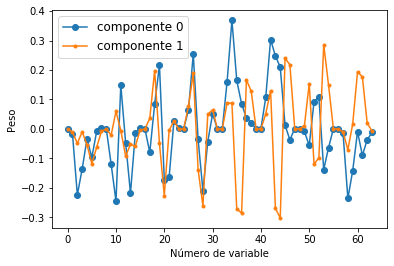

In [28]:
plt.plot(range(0, 64), pca.components_[0], marker='o', label='componente 0')
plt.plot(range(0, 64), pca.components_[1], marker='.', label='componente 1')
plt.xlabel('Número de variable')
plt.ylabel('Peso')
plt.legend(prop=dict(size=12))
plt.show()

En resumen, PCA nos calcula nuevas variables, que se calculan como un polinomio sobre las variables originales. Estas nuevas variables (componentes principales) están ordenadas de la más importante a la menos importante.

¿Qué aplicaciones podríamos encontrar a esta propiedad?



### Reducción de atributos con PCA

Por ejemplo, podríamos utilizarlo para reducir el número de atributos de un dataset. Si las variables están ordenadas de la más importante a la menos, podríamos iterar buscando un número reducido de variables que igualen los resultados con el dataset originales.

Vamos a evaluar primero el caso base:

In [29]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

svc = SVC(gamma='auto',random_state=42)
scores = cross_val_score(svc, dataset_X, dataset_y, cv=5)
base_accuracy = scores.mean()
print("Components: All   Accuracy: %.3f" % (base_accuracy))

Components: All   Accuracy: 0.449


Y ahora vamos a estudiar como reduciendo el número de componentes varía el porcentaje de acierto del algoritmo:

................................................................

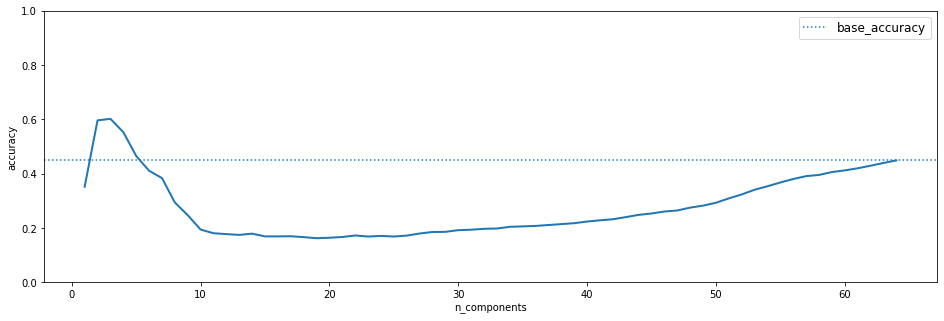

In [30]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

accuracy = []
n_components = []

for n in range(1, 65):
    pca = PCA(n_components=n)
    pca.fit(dataset_X)
    transformed_X = pca.transform(dataset_X)
    
    svc = SVC(gamma='auto',random_state=42)
    scores = cross_val_score(svc, transformed_X, dataset_y, cv=5)
    
    n_components.append(n)
    accuracy.append(scores.mean())
    #print("Components: %03d   Accuracy: %.3f" % (n, scores.mean()))
    print(".", end='')

    
plt.figure(1, figsize=(16, 5))
plt.clf()
plt.plot(n_components, accuracy, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('accuracy')
axes = plt.gca()
axes.set_ylim([0, 1])
plt.axhline(base_accuracy, linestyle=':', label='base_accuracy')
plt.legend(prop=dict(size=12))

Viendo los resultados:

* ¿Cómo explicas que exista una zona al principio que obtenga mejores resultados que el caso con todos los atributos?
* ¿Crees que es correcto lo que estamos haciendo?, ¿Cuáles son los pros y cons que ves?
* ¿Qué más aplicaciones se te ocurren para este algoritmo?

### Uso de PCA para identificar grupos

Otra aplicación interesante del análisis de componentes principales, es utilizar esta transformación, como una manera de "remapear" los puntos en un nuevo espacio más compacto, en el que seamos capaces de identificar mejor los distintos grupos de individuos que existen en el dataset original.

Un punto muy importante de esta aplicación, es que este algoritmo infiere de los datos la estructura de los mismos, no necesitando como variable de entrada, ni el número de grupos, ni a que elementos pertenece cada grupo.

In [31]:
def dibuja_digitos(X, y, font_size=9):
    colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
          "#A83683", "#4E655E", "#853541", "#3A3120","#535D8E"]
    plt.figure(figsize=(16, 10))
    plt.xlim(X[:, 0].min(), X[:, 0].max() + 1)
    plt.ylim(X[:, 1].min(), X[:, 1].max() + 1)
    
    for i in range(len(X)):
        # actually plot the digits as text instead of using scatter
        clr = colors[y[i]]
        fd = {'weight': 'bold', 'size': font_size}
        plt.text(X[i, 0], X[i, 1], str(y[i]), color = clr, fontdict=fd)

In [32]:
from sklearn.decomposition import PCA

pca = PCA(random_state=42, n_components=2)
pca.fit(dataset_X)
dataset_X_pca = pca.transform(dataset_X)

Vamos a dibujar las dos primeras componentes para ver que pinta tienen:

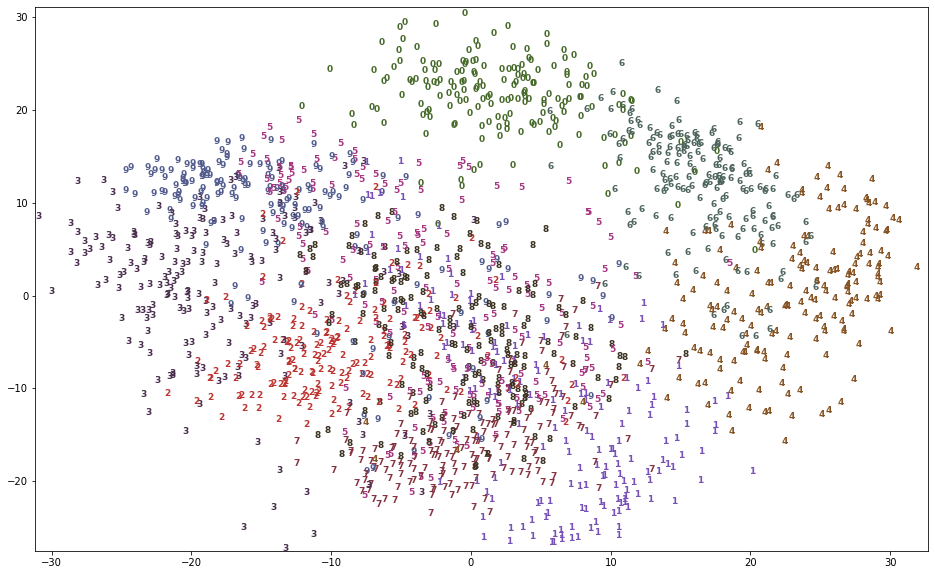

In [33]:
dibuja_digitos(dataset_X_pca, dataset_y)

Como podemos observar, ya se perciben ciertos grupos identificables en el dataset transformados. Como vemos los dos primeros componentes son bastante eficientes a la hora de clasificar los datos en distintos grupos.

### Preguntas

* ¿Qué opinas de estos resultados?
* ¿Qué opinas de este tipo de técnicas?

### Manifolds

El principal inconveniente de PCA es su linealidad. Esto nos limita el grado de las transformaciones a obtener, a cambio PCA es un algoritmo bastante rápido. 

Existen otros algoritmos capaces de realizar tareas similares a PCA pero de una forma no lineal, un ejemplo de ellos es `TSNE` (*t-distributed Stochastic Neighbor Embedding*):

In [34]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
dataset_X_tsne = tsne.fit_transform(dataset_X)

Como podemos ver este algoritmo es capaz de dar un paso más allá identificando grupos automáticamente:

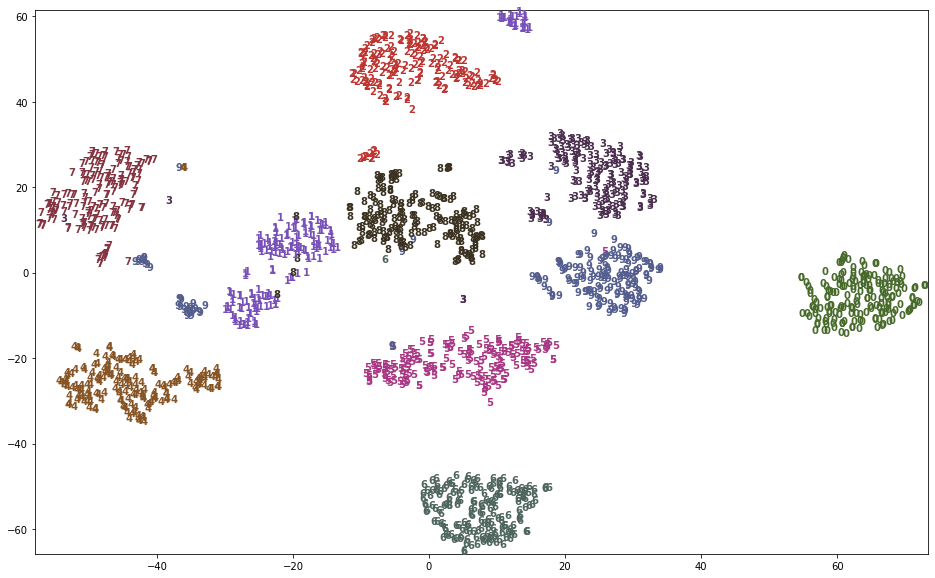

In [35]:
dibuja_digitos(dataset_X_tsne, dataset_y, font_size=10)

* ¿Qué opinas de estos resultados?
* ¿Qué opinas de este tipo de técnicas?